In [11]:
# -*- coding: utf-8 -*-
import numpy as np
import h5py
import os
import keras
import numpy as np
# from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, Dense, Input, add, Activation, GlobalAveragePooling2D
from keras.initializers import he_normal
from keras.callbacks import LearningRateScheduler, TensorBoard
from keras.models import Model
from keras import optimizers
from keras import regularizers

from keras.utils import np_utils, conv_utils
from keras.models import Model
from keras.layers import Flatten, Dense, Input 
from keras.optimizers import Adam
from keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import *
from keras.models import *
from keras.callbacks import *
#from visual_callbacks import AccLossPlotter

In [2]:
##https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
import json
import cv2

with open(r'./scene_train_annotations_20170904.json', 'r') as f:
  data = json.load(f)
# label=json.loads()
with open(r'./scene_validation_annotations_20170908.json', 'r') as f1:
  val = json.load(f1)

In [8]:
name=[]
label=[]
for i in range(0,len(data)):
    name.append(data[i]['image_id'])
    label.append(data[i]['label_id'])

In [9]:
name1=[]
label1=[]
for i in range(0,len(val)):
    name1.append(val[i]['image_id'])
    label1.append(val[i]['label_id'])

In [10]:
import numpy as np
label=np.array(label)
label1=np.array(label1)

In [11]:
label=label.astype(int)
label1=label1.astype(int)

In [38]:
#%cd data
%cd resizedv

/media/cs/Windows/ai_challenger_scene_train_20170904/data/resizedv


In [ ]:
###Bash Scripy
# #!/bin/bash
# for ((i=1; i<=80; i++))
#   do
#     mkdir $i
#   done


In [31]:
from shutil import move
for i in range(0,53879):
    move(name[i], './' + str(label[i]))

Error: Destination path './66/79f993ae0858ae238b22968c5934d1ddba585ae4.jpg' already exists

In [41]:
from shutil import move
for i in range(0,7120):
    move(name1[i], './' + str(label1[i]))

In [43]:
%cd ..

/media/cs/Windows/ai_challenger_scene_train_20170904


In [ ]:
# import os
# name=[]
# for filename in os.listdir(r"./scene_train_images_20170904/"):
# #     print ( filename) 
#     name.append(filename)

In [23]:
# y=[]
# for s in name:
#   for n in range(0,len(data)):
#     if s==data[n]['image_id']:
#         y.append(data[n]['label_id'])

In [57]:
label.shape

(53879,)

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


In [47]:
label

array([66, 61, 64, ..., 44, 48, 67])

In [16]:
#np.save("valx.npy",name)

In [ ]:
import cv2

train_set_x=[]
train_set_x
for n in name:
    img1 = cv2.imread(r"./data/resized/%s"%n)   #读取图片，第二个参数表示以灰度图像读入 
   # NewImg = cv2.resize(img1, (128,128))  
    NewImg = np.array(img1)
    x_train = NewImg.astype('float32')
    x_train[:,:,0] = (x_train[:,:,0] - np.mean(x_train[:,:,0])) / np.std(x_train[:,:,0])
    x_train[:,:,1] = (x_train[:,:,1] - np.mean(x_train[:,:,1])) / np.std(x_train[:,:,1])
    x_train[:,:,2] = (x_train[:,:,2] - np.mean(x_train[:,:,2])) / np.std(x_train[:,:,2])
    train_set_x.append(x_train)               #将list添加到已有的list中



In [ ]:
train_set_x[0]

In [29]:
val_set_x=[]
for n in name1:
    img2 = cv2.imread(r"./data/resizedv/%s"%n)   #读取图片，第二个参数表示以灰度图像读入   
   # NewImg = cv2.resize(img2, (128,128))  
    NewImg = np.array(img2)
    x_train = NewImg.astype('float32')
    x_train[:,:,0] = (x_train[:,:,0] - np.mean(x_train[:,:,0])) / np.std(x_train[:,:,0])
    x_train[:,:,1] = (x_train[:,:,1] - np.mean(x_train[:,:,1])) / np.std(x_train[:,:,1])
    x_train[:,:,2] = (x_train[:,:,2] - np.mean(x_train[:,:,2])) / np.std(x_train[:,:,2])
    val_set_x.append(x_train)               #将list添加到已有的list中

In [30]:
val_set_x=np.array(val_set_x)

In [31]:
val_set_x.shape

(7120, 256, 256, 3)

In [32]:
np.save("val_set_x_np.npy",val_set_x)

In [14]:
img1 = cv2.imread(r"./data/resizedv/0a1b8399ef7d9b317fdcc3fbe711fbc3a7527b91.jpg") 

In [15]:
img1.shape

(256, 256, 3)

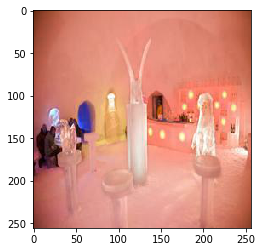

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img1) 


In [48]:
NewImg = cv2.resize(img1, (128,128))  

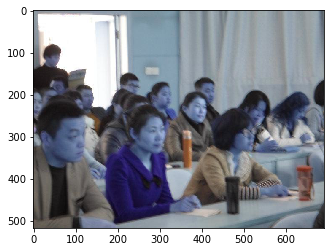

In [49]:
plt.imshow(img1) 

In [12]:

depth              = 8
wide               = 4
num_classes        = 80
img_rows, img_cols = 256, 256
img_channels       = 3
batch_size         = 64
epochs             = 1
iterations         = 391
weight_decay       = 0.0005
log_filepath       = r'./ai_w_resnet/'

In [13]:
def scheduler(epoch):
    if epoch <= 60:
        return 0.1
    if epoch <= 120:
        return 0.02
    if epoch <= 160:
        return 0.004
    return 0.0008

In [14]:
def color_preprocessing(x_train,x_test):
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train[:,:,:,0] = (x_train[:,:,:,0] - np.mean(x_train[:,:,:,0])) / np.std(x_train[:,:,:,0])
    x_train[:,:,:,1] = (x_train[:,:,:,1] - np.mean(x_train[:,:,:,1])) / np.std(x_train[:,:,:,1])
    x_train[:,:,:,2] = (x_train[:,:,:,2] - np.mean(x_train[:,:,:,2])) / np.std(x_train[:,:,:,2])
    x_test[:,:,:,0] = (x_test[:,:,:,0] - np.mean(x_test[:,:,:,0])) / np.std(x_test[:,:,:,0])
    x_test[:,:,:,1] = (x_test[:,:,:,1] - np.mean(x_test[:,:,:,1])) / np.std(x_test[:,:,:,1])
    x_test[:,:,:,2] = (x_test[:,:,:,2] - np.mean(x_test[:,:,:,2])) / np.std(x_test[:,:,:,2])

    return x_train, x_test

def wide_residual_network(img_input,classes_num,depth,k):

    print('Wide-Resnet %dx%d' %(depth, k))
    n_filters  = [16, 16*k, 32*k, 64*k]
    n_stack    = (depth - 4) / 6
    in_filters = 16

    def conv3x3(x,filters):
    	return Conv2D(filters=filters, kernel_size=(3,3), strides=(1,1), padding='same',
    	kernel_initializer=he_normal(),
        kernel_regularizer=regularizers.l2(weight_decay))(x)

    def residual_block(x,out_filters,increase_filter=False):
        if increase_filter:
            first_stride = (2,2)
        else:
            first_stride = (1,1)
        pre_bn   = BatchNormalization()(x)
        pre_relu = Activation('relu')(pre_bn)
        conv_1 = Conv2D(out_filters,kernel_size=(3,3),strides=first_stride,padding='same',kernel_initializer=he_normal(),kernel_regularizer=regularizers.l2(weight_decay))(pre_relu)
        bn_1   = BatchNormalization()(conv_1)
        relu1  = Activation('relu')(bn_1)
        conv_2 = Conv2D(out_filters, kernel_size=(3,3), strides=(1,1), padding='same', kernel_initializer=he_normal(),kernel_regularizer=regularizers.l2(weight_decay))(relu1)
        if increase_filter or in_filters != out_filters:
            projection = Conv2D(out_filters,kernel_size=(1,1),strides=first_stride,padding='same',kernel_initializer=he_normal(),kernel_regularizer=regularizers.l2(weight_decay))(x)
            block = add([conv_2, projection])
        else:
            block = add([conv_2,x])
        return block

    def wide_residual_layer(x,out_filters,increase_filter=False):
    	x = residual_block(x,out_filters,increase_filter)
    	in_filters = out_filters
    	for _ in range(1,int(n_stack)):
    		x = residual_block(x,out_filters)
    	return x


    x = conv3x3(img_input,n_filters[0])
    x = wide_residual_layer(x,n_filters[1])
    x = wide_residual_layer(x,n_filters[2],increase_filter=True)
    x = wide_residual_layer(x,n_filters[3],increase_filter=True)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(classes_num,activation='softmax',kernel_initializer=he_normal(),kernel_regularizer=regularizers.l2(weight_decay))(x)
    return x


In [15]:
#     x_train=np.array(train_set_x)
#     x_test=np.array(val_set_x)
#     y_train=label
#     y_test=label1
    
#     color preprocessing
#     x_train, x_test = color_preprocessing(x_train, x_test)

In [16]:
# train_generator = train_datagen.flow_from_directory(
#         './data/resize',
        
#         batch_size=128,
#         class_mode='binary')

In [17]:
    # build network
    img_input = Input(shape=(img_rows,img_cols,img_channels))
    output = wide_residual_network(img_input,num_classes,depth,wide)
    resnet = Model(img_input, output)
    print(resnet.summary())
    # set optimizer
#     sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
    adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

    resnet.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#     resnet.load_weights(r'my_model_weights.h5')



Wide-Resnet 8x4
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 256, 256, 3)   0                                            
____________________________________________________________________________________________________
conv2d_20 (Conv2D)               (None, 256, 256, 16)  448         input_2[0][0]                    
____________________________________________________________________________________________________
batch_normalization_14 (BatchNor (None, 256, 256, 16)  64          conv2d_20[0][0]                  
____________________________________________________________________________________________________
activation_14 (Activation)       (None, 256, 256, 16)  0           batch_normalization_14[0][0]     
___________________________________________________________________________

In [18]:
    class LossHistory(Callback):
     def on_train_begin(self, logs={}):
        self.losses = []

     def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
    # set callback
    tb_cb = TensorBoard(log_dir=log_filepath, histogram_freq=0)
    change_lr = LearningRateScheduler(scheduler)
  #  cbks = [change_lr,tb_cb]
    checkpointer = ModelCheckpoint(filepath="chars_rec.hdf5", verbose=1, save_best_only=True, )
    history = LossHistory()

    # set data augmentation
    print('Using real-time data augmentation.')
    datagen = ImageDataGenerator(horizontal_flip=True,
            width_shift_range=0.125,height_shift_range=0.125,fill_mode='nearest',cval=0.)

  #  datagen.fit(x_train)
    train_generator = datagen.flow_from_directory(  r'./data/resized',target_size=(256, 256),batch_size=16, class_mode='categorical')
    val_generator = datagen.flow_from_directory(  r'./data/resizedv',target_size=(256, 256),batch_size=16, class_mode='categorical')

Using real-time data augmentation.
Found 53110 images belonging to 80 classes.
Found 7020 images belonging to 80 classes.


In [19]:
    # start training
    resnet.fit_generator(train_generator,
                        steps_per_epoch=53880//32,
                        epochs=epochs,
                        callbacks=[change_lr,tb_cb,checkpointer,history],
                        validation_data=val_generator,
                         validation_steps=7120//32)
    resnet.save('resnet1.h5')

Epoch 1/1
 435/1683 [======>.......................] - ETA: 976s - loss: 4.9695 - acc: 0.0151

KeyboardInterrupt: 

In [ ]:
    resnet.save_weights('resnet1_wei.h5')